In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection  import cross_val_score
from scipy.stats import bayes_mvs

df = pd.read_csv('satisfacao_clientes.csv')
x = df[['recencia','frequencia',
           'semanas_de_inscricao']]
y = df['situacao'].values

k = 10

In [30]:
df.describe()

,recencia,frequencia,semanas_de_inscricao,situacao
count,225.000000,225.000000,225.000000,225.000000
mean,2.093333,2.173333,4.866667,1.053333
std,0.997855,1.077862,2.356602,0.488072
min,1.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,3.000000,1.000000
50%,2.000000,2.000000,5.000000,1.000000
75%,3.000000,3.000000,7.000000,1.000000
max,4.000000,4.000000,8.000000,2.000000


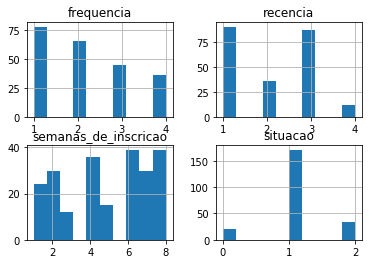

In [35]:
import matplotlib.pyplot as plt
df.hist()
plt.show()

In [31]:
df.isnull().sum()

recencia                0
frequencia              0
semanas_de_inscricao    0
situacao                0
dtype: int64

In [33]:
df.dtypes

recencia                int64
frequencia              int64
semanas_de_inscricao    int64
situacao                int64
dtype: object

{'whiskers': [<matplotlib.lines.Line2D at 0x2e78f76c8d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2e78f7751d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2e78f76c780>],
 'medians': [<matplotlib.lines.Line2D at 0x2e78f775a20>],
 'fliers': [<matplotlib.lines.Line2D at 0x2e78f775e48>],
 'means': []}

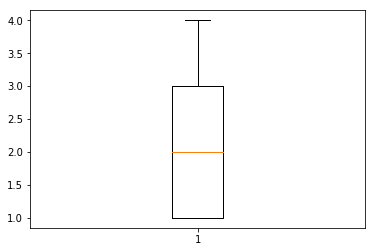

In [39]:
plt.boxplot(df['recencia'], showfliers= True)

{'whiskers': [<matplotlib.lines.Line2D at 0x2e7907cffd0>,
 'caps': [<matplotlib.lines.Line2D at 0x2e7907d68d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2e7907cfe80>],
 'medians': [<matplotlib.lines.Line2D at 0x2e7907dd160>],
 'fliers': [<matplotlib.lines.Line2D at 0x2e7907dd588>],
 'means': []}

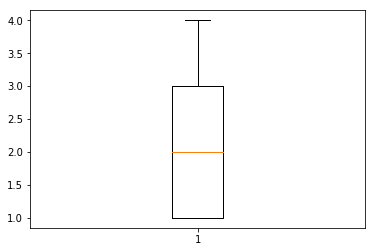

In [41]:
plt.boxplot(df['frequencia'], showfliers= True)

{'whiskers': [<matplotlib.lines.Line2D at 0x2e790825c88>,
 'caps': [<matplotlib.lines.Line2D at 0x2e79082f588>,
 'boxes': [<matplotlib.lines.Line2D at 0x2e790825b38>],
 'medians': [<matplotlib.lines.Line2D at 0x2e79082fd68>],
 'fliers': [<matplotlib.lines.Line2D at 0x2e7908371d0>],
 'means': []}

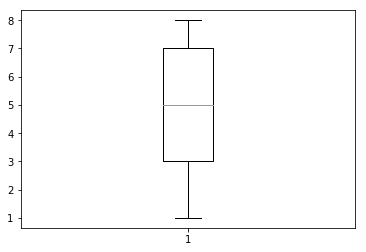

In [42]:
plt.boxplot(df['semanas_de_inscricao'], showfliers= True)

                      recencia  frequencia  semanas_de_inscricao  situacao
recencia              1.000000   -0.749783             -0.000380 -0.560253
frequencia           -0.749783    1.000000             -0.022496  0.669718
semanas_de_inscricao -0.000380   -0.022496              1.000000 -0.482839
situacao             -0.560253    0.669718             -0.482839  1.000000


NameError: name 'names' is not defined

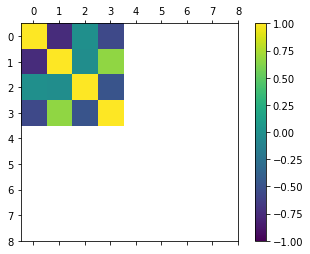

In [45]:
import numpy
correlations = df.corr()
print(correlations)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [53]:
import numpy as np
from sklearn.model_selection  import cross_val_score
from scipy.stats import bayes_mvs


from sklearn.naive_bayes import MultinomialNB
modeloMultinomial = MultinomialNB()

scores = cross_val_score(modeloMultinomial,x,y,cv = k)
media, variancia, desvio = bayes_mvs(scores,0.95)
print(media[0])







0.8134466403162055


In [54]:
from sklearn.ensemble import AdaBoostClassifier
modeloAdaBoost = AdaBoostClassifier()

scores = cross_val_score(modeloAdaBoost,x,y,cv = k)
media, variancia, desvio = bayes_mvs(scores,0.95)
print(media[0])


0.7607351778656126


In [56]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
modeloOneVsRest = OneVsRestClassifier(LinearSVC(random_state = 0))
scores = cross_val_score(modeloOneVsRest,x,y,cv = k)
media, variancia, desvio = bayes_mvs(scores,0.95)
print(media[0])


0.9200632411067191


In [58]:
from sklearn.multiclass import OneVsOneClassifier
modeloOneVsOne = OneVsOneClassifier(LinearSVC(random_state = 0))

scores = cross_val_score(modeloOneVsOne,x,y,cv = k)
print(scores.mean())


1.0
